In [1]:
!pip install pandas matplotlib

IMPORT ALL THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/SampleSuperstore (3).csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df = df.drop(columns="Postal Code")

In [28]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [27]:
print(sum(df['Profit']))

286397.0217000013


Sales and Profit by Ship Mode


In [17]:
ship_mode_sales_profit = df.groupby('Ship Mode')['Sales', 'Profit'].sum()
print(ship_mode_sales_profit)

                       Sales       Profit
Ship Mode                                
First Class     3.514284e+05   48969.8399
Same Day        1.283631e+05   15891.7589
Second Class    4.591936e+05   57446.6354
Standard Class  1.358216e+06  164088.7875


<ipython-input-17-172e12e93fba>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ship_mode_sales_profit = df.groupby('Ship Mode')['Sales', 'Profit'].sum()


Sales and Profit by Category

In [18]:
category_sales_profit = df.groupby('Category')['Sales', 'Profit'].sum()
print(category_sales_profit)

                       Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


<ipython-input-18-bd30f3f5b871>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_sales_profit = df.groupby('Category')['Sales', 'Profit'].sum()


Top 5 profitable subcategories

In [10]:
top_5_profitable_subcategories = df.groupby('Sub-Category')['Profit'].sum().nlargest(5)
print(top_5_profitable_subcategories)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64


Correlation between Sales, Quantity, Discount, and Profit

In [19]:
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


Visualize sales by category using a bar chart

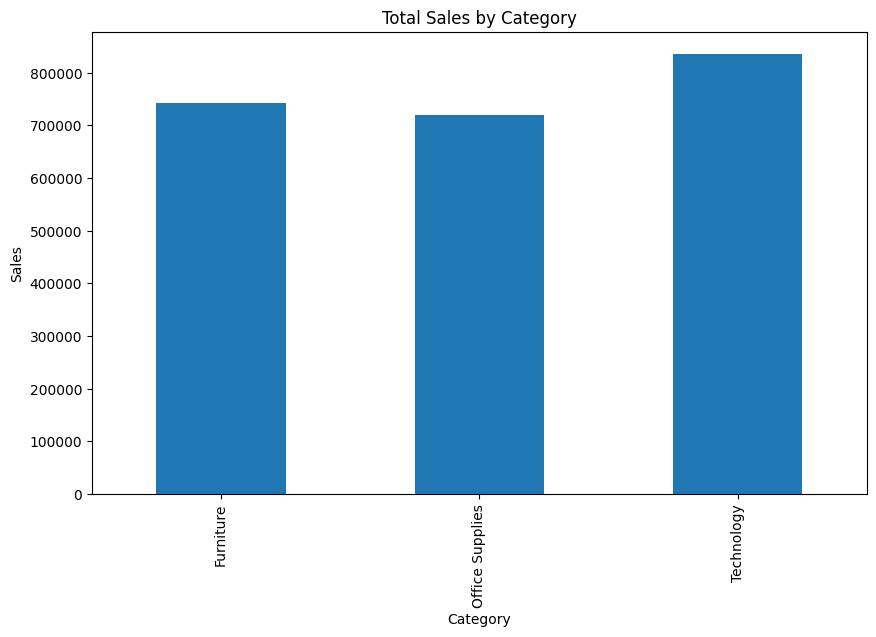

In [20]:
plt.figure(figsize=(10, 6))
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

<Axes: ylabel='Sales'>

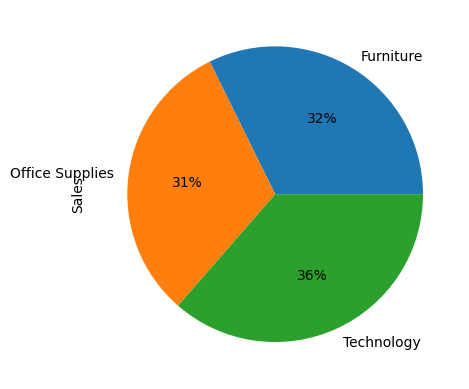

In [13]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

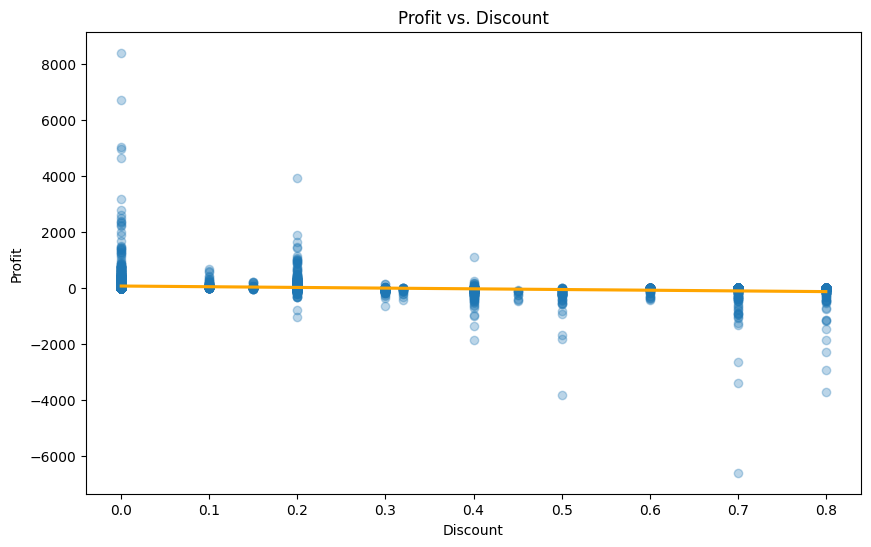

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount', y='Profit', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'orange'})
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

Proportion of Quantity Sold by Segment

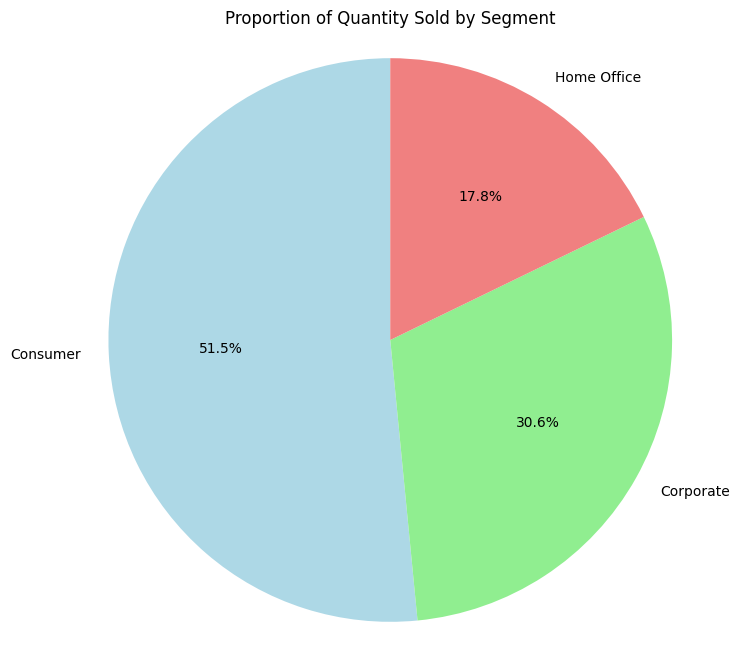

In [15]:
segment_quantity = df.groupby('Segment')['Quantity'].sum()
plt.figure(figsize=(8, 8))
plt.pie(segment_quantity, labels=segment_quantity.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Quantity Sold by Segment')
plt.axis('equal')
plt.show()

<Axes: xlabel='State'>

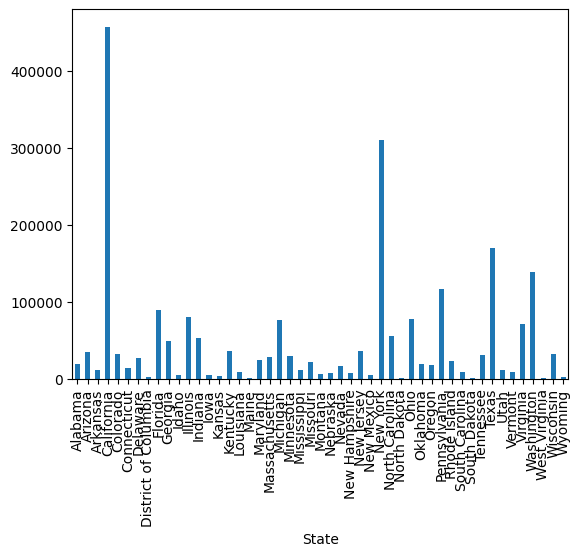

In [16]:
df.groupby("State")["Sales"].sum().plot.bar()

Sales by Region

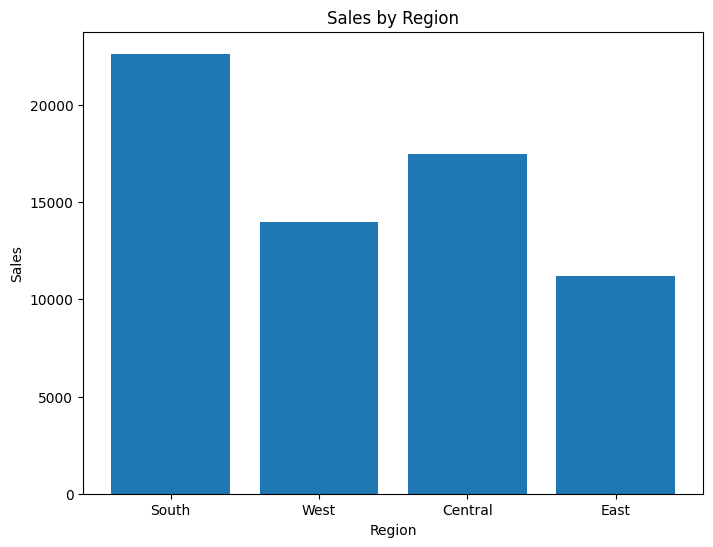

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(df['Region'], df['Sales'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by Region')
plt.show()

Profit With Respect To Each Segment

<Axes: xlabel='Segment'>

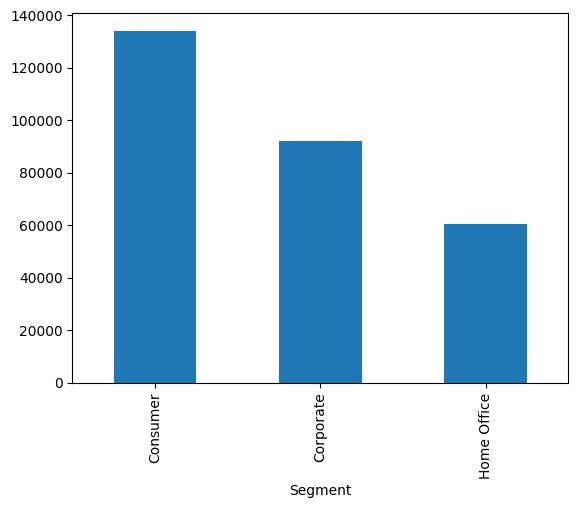

In [31]:
df.groupby("Segment")["Profit"].sum().plot.bar()

Profit With Respect To Each Category

<Axes: xlabel='Category'>

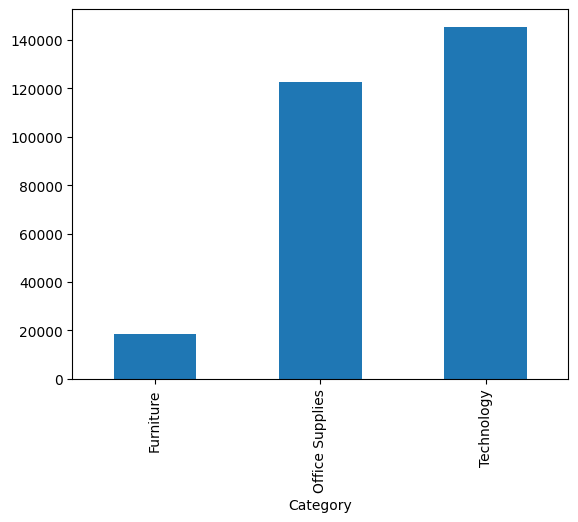

In [32]:
df.groupby("Category")["Profit"].sum().plot.bar()